In [23]:
import pandas as pd

In [2]:
pima=pd.read_csv("/Users/sudipmajumder/Downloads/diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0      148
1       85
2      183
3       89
4      137
5      116
6       78
7      115
8      197
9      125
10     110
11     168
12     139
13     189
14     166
15     100
16     118
17     107
18     103
19     115
20     126
21      99
22     196
23     119
24     143
25     125
26     147
27      97
28     145
29     117
      ... 
738     99
739    102
740    120
741    102
742    109
743    140
744    153
745    100
746    147
747     81
748    187
749    162
750    136
751    121
752    108
753    181
754    154
755    128
756    137
757    123
758    106
759    190
760     88
761    170
762     89
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [11]:
X=pima[['BloodPressure','Insulin','BMI','Age']]

In [12]:
y=pima.Outcome

In [13]:
X

,Insulin,BMI,Age
0,0,33.6,50
1,0,26.6,31
2,0,23.3,32
3,94,28.1,21
4,168,43.1,33
5,0,25.6,30
6,88,31.0,26
7,0,35.3,29
8,543,30.5,53
9,0,0.0,54


In [14]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

/Users/sudipmajumder/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

In [17]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 48,  14]])

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6822916666666666
Precision: 0.5185185185185185
Recall: 0.22580645161290322


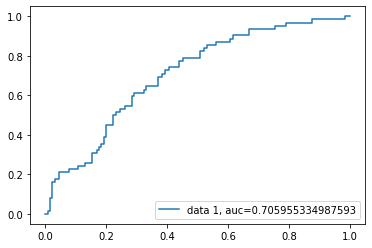

In [21]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
